In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('/Dashboard\\crypto_raw_data.csv', parse_dates=['timestamp'])

In [5]:
# We change the timestamp as the index for the dataset
# We sort the data with the index value
# Display the five rows from the dataset
df.set_index('timestamp', inplace=True)
df = df.sort_index()
df.head()

,coin_id,current_price,market_cap,total_volume
timestamp,,,,
2025-08-02 11:42:18.330,bitcoin,113843.0,2267457749217,56442387506
2025-08-02 11:43:18.833,bitcoin,113805.0,2267457749217,56432916746
2025-08-02 11:44:19.313,bitcoin,113805.0,2267457749217,56433419211
2025-08-02 11:45:19.833,bitcoin,113809.0,2267457749217,56414098972
2025-08-02 11:46:20.350,bitcoin,113825.0,2267457749217,53078566909


In [9]:
#we resampled the data and then took the mean of the data
resampled_df = df.select_dtypes(include='number').resample('1min').mean().dropna()
print(resampled_df.head())

                     current_price    market_cap  total_volume
timestamp                                                     
2025-08-02 11:42:00       113843.0  2.267458e+12  5.644239e+10
2025-08-02 11:43:00       113805.0  2.267458e+12  5.643292e+10
2025-08-02 11:44:00       113805.0  2.267458e+12  5.643342e+10
2025-08-02 11:45:00       113809.0  2.267458e+12  5.641410e+10
2025-08-02 11:46:00       113825.0  2.267458e+12  5.307857e+10


In [13]:
df.info

<bound method DataFrame.info of                          coin_id  current_price     market_cap  total_volume
timestamp                                                                   
2025-08-02 11:42:18.330  bitcoin       113843.0  2267457749217   56442387506
2025-08-02 11:43:18.833  bitcoin       113805.0  2267457749217   56432916746
2025-08-02 11:44:19.313  bitcoin       113805.0  2267457749217   56433419211
2025-08-02 11:45:19.833  bitcoin       113809.0  2267457749217   56414098972
2025-08-02 11:46:20.350  bitcoin       113825.0  2267457749217   53078566909
...                          ...            ...            ...           ...
2025-08-02 13:39:40.660  bitcoin       113931.0  2267295381365   53502273441
2025-08-02 13:40:42.247  bitcoin       113929.0  2267295381365   53601264835
2025-08-02 13:41:42.803  bitcoin       113928.0  2267295381365   53447270986
2025-08-02 13:42:43.363  bitcoin       113930.0  2267295381365   53362553276
2025-08-02 13:43:43.877  bitcoin       11392

In [14]:
df.describe()

,current_price,market_cap,total_volume
count,121.000000,1.210000e+02,1.210000e+02
mean,113739.603306,2.263577e+12,5.457943e+10
std,147.886695,3.002991e+09,1.408721e+09
min,113499.000000,2.258825e+12,5.220775e+10
25%,113620.000000,2.261169e+12,5.336255e+10
50%,113707.000000,2.262303e+12,5.469275e+10
75%,113872.000000,2.266224e+12,5.587008e+10
max,113963.000000,2.267948e+12,5.659500e+10


In [15]:
df.dtypes

coin_id           object
current_price    float64
market_cap         int64
total_volume       int64
dtype: object

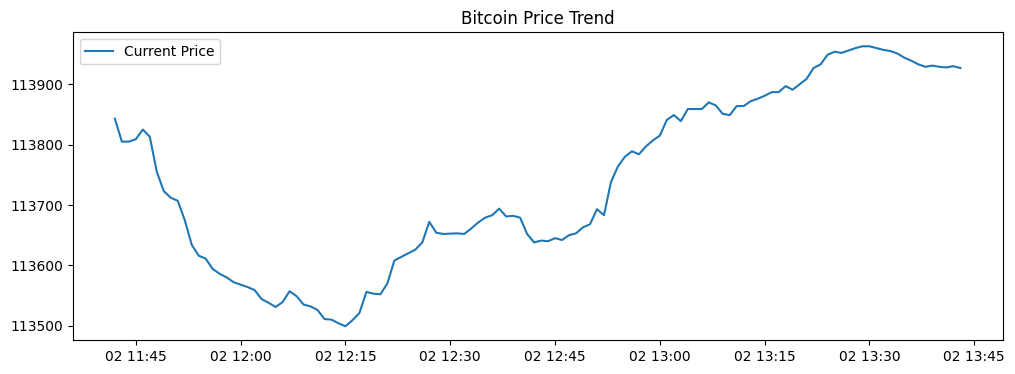

In [10]:
#Plot for quick EDA
plt.figure(figsize=(12, 4))
plt.plot(resampled_df['current_price'], label='Current Price')
plt.title('Bitcoin Price Trend')
plt.legend()
plt.show()


In [11]:
scaler = MinMaxScaler()
scaled_df = scaler.fit_transform(resampled_df)